# Analysis and Visualization of Complex Agro-Environmental Data
---
## Data transformation

### 1. Reshaping Pandas DataFrames by stacking/unstacking and pivoting

In many situations, it is important to reshape the data tables to prepare data to be analysed or visualized using certain functions. Here, the most common reshaping operations are demonstrated.

#### Create DataFrame

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.stats as stm

In [2]:

data = {'Hold': ['A', 'B', 'C', 'D', 'A', 'C', 'B', 'C', 'A', 'A', 'A', 'B', 'C', 'D', 'C', 'B', 'B', 'C', 'D', 'A'],
        'Year': [2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002, 2003, 2003, 2003, 2003, 2004, 2004, 2004, 2004, 2005, 2005, 2005, 2005],
        'Fruit': ['strawberry', 'blackberry', 'raspberry', 'blue berry', 'gooseberry', 'strawberry', 'blackberry', 'raspberry', 'blue berry', 'gooseberry', 'strawberry', 'blackberry', 'raspberry', 'blue berry', 'gooseberry', 'strawberry', 'blackberry', 'raspberry', 'blue berry', 'gooseberry'],
        'Production': [1000, 300, 400, 500, 800, 1000, 500, 700, 50, 60, 1000, 900, 750, 200, 300, 1000, 900, 250, 750, 50],
        }

df = pd.DataFrame(data)
print(df)

   Hold  Year       Fruit  Production
0     A  2001  strawberry        1000
1     B  2001  blackberry         300
2     C  2001   raspberry         400
3     D  2001  blue berry         500
4     A  2002  gooseberry         800
5     C  2002  strawberry        1000
6     B  2002  blackberry         500
7     C  2002   raspberry         700
8     A  2003  blue berry          50
9     A  2003  gooseberry          60
10    A  2003  strawberry        1000
11    B  2003  blackberry         900
12    C  2004   raspberry         750
13    D  2004  blue berry         200
14    C  2004  gooseberry         300
15    B  2004  strawberry        1000
16    B  2005  blackberry         900
17    C  2005   raspberry         250
18    D  2005  blue berry         750
19    A  2005  gooseberry          50


#### Stack and Unstack

In [3]:
# 1. Define hold and Fruit as row indices
df2 = df[['Fruit', 'Hold', 'Production']]
df2 = df2.set_index(['Hold', 'Fruit'], append=True)
print(df2)


                    Production
   Hold Fruit                 
0  A    strawberry        1000
1  B    blackberry         300
2  C    raspberry          400
3  D    blue berry         500
4  A    gooseberry         800
5  C    strawberry        1000
6  B    blackberry         500
7  C    raspberry          700
8  A    blue berry          50
9  A    gooseberry          60
10 A    strawberry        1000
11 B    blackberry         900
12 C    raspberry          750
13 D    blue berry         200
14 C    gooseberry         300
15 B    strawberry        1000
16 B    blackberry         900
17 C    raspberry          250
18 D    blue berry         750
19 A    gooseberry          50


In [4]:
# 2. Unstack using 'Fruit' categories as columns (i.e. convert to a 'wide format' table)
df2Unstack = df2.unstack()
print(df2Unstack) # it will unstack the last level ('Fruit')

        Production                                           
Fruit   blackberry blue berry gooseberry raspberry strawberry
   Hold                                                      
0  A           NaN        NaN        NaN       NaN     1000.0
1  B         300.0        NaN        NaN       NaN        NaN
2  C           NaN        NaN        NaN     400.0        NaN
3  D           NaN      500.0        NaN       NaN        NaN
4  A           NaN        NaN      800.0       NaN        NaN
5  C           NaN        NaN        NaN       NaN     1000.0
6  B         500.0        NaN        NaN       NaN        NaN
7  C           NaN        NaN        NaN     700.0        NaN
8  A           NaN       50.0        NaN       NaN        NaN
9  A           NaN        NaN       60.0       NaN        NaN
10 A           NaN        NaN        NaN       NaN     1000.0
11 B         900.0        NaN        NaN       NaN        NaN
12 C           NaN        NaN        NaN     750.0        NaN
13 D    

In [5]:
# Unstack using'Hold' categories as columns
df2unstack = df2.unstack(level=1) # level=1 means index 'hold' (last level by default)
print(df2unstack)

              Production                       
Hold                   A       B       C      D
   Fruit                                       
0  strawberry     1000.0     NaN     NaN    NaN
1  blackberry        NaN   300.0     NaN    NaN
2  raspberry         NaN     NaN   400.0    NaN
3  blue berry        NaN     NaN     NaN  500.0
4  gooseberry      800.0     NaN     NaN    NaN
5  strawberry        NaN     NaN  1000.0    NaN
6  blackberry        NaN   500.0     NaN    NaN
7  raspberry         NaN     NaN   700.0    NaN
8  blue berry       50.0     NaN     NaN    NaN
9  gooseberry       60.0     NaN     NaN    NaN
10 strawberry     1000.0     NaN     NaN    NaN
11 blackberry        NaN   900.0     NaN    NaN
12 raspberry         NaN     NaN   750.0    NaN
13 blue berry        NaN     NaN     NaN  200.0
14 gooseberry        NaN     NaN   300.0    NaN
15 strawberry        NaN  1000.0     NaN    NaN
16 blackberry        NaN   900.0     NaN    NaN
17 raspberry         NaN     NaN   250.0

In [6]:
# Stack again (i.e. convert to a 'long format' table)
df2stack = df2unstack.stack()
print(df2stack)

                    Production
   Fruit      Hold            
0  strawberry A         1000.0
1  blackberry B          300.0
2  raspberry  C          400.0
3  blue berry D          500.0
4  gooseberry A          800.0
5  strawberry C         1000.0
6  blackberry B          500.0
7  raspberry  C          700.0
8  blue berry A           50.0
9  gooseberry A           60.0
10 strawberry A         1000.0
11 blackberry B          900.0
12 raspberry  C          750.0
13 blue berry D          200.0
14 gooseberry C          300.0
15 strawberry B         1000.0
16 blackberry B          900.0
17 raspberry  C          250.0
18 blue berry D          750.0
19 gooseberry A           50.0


/var/folders/hx/861ncdvn7w35qt5pmqz0hv980000gn/T/ipykernel_40754/3032259393.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df2stack = df2unstack.stack()


#### Pivot table

A more useful and versatile function to unstack a data table is the pandas' pivot_table() function. After normalizing a given dataset, it is frequently useful to pivoting a table in order to convert a categorical variable with n classes into n separate variables. The values may represent different  summarizations of a continuous variable associated to each category, such as the sum, the mean, the maximum, ...

Run the examples below using the same DataFrame created above.

In [7]:
# pivoting based on column 'Fruit'

dfpivot1 = pd.pivot_table(
    data=df,
    index='Hold', # lines will be indexed by 'Hold'
    columns='Fruit', # Columns defined by the 'Fruit' categories
    values='Production', # The values in the resulting table
    aggfunc='sum' # sums the production by 'Hold'
)
dfpivot1

Fruit,blackberry,blue berry,gooseberry,raspberry,strawberry
Hold,,,,,
A,NaN,50.0,910.0,NaN,2000.0
B,2600.0,NaN,NaN,NaN,1000.0
C,NaN,NaN,300.0,2100.0,1000.0
D,NaN,1450.0,NaN,NaN,NaN


In [8]:
# pivoting based on 2 columns/variables: 'Fruit' and 'Year'

dfpivot2 = pd.pivot_table(
    data=df,
    index='Hold',
    columns=['Fruit','Year'], # Columns defined by the 'Fruit' and 'Year' categories
    values='Production'
)
dfpivot2

Fruit blackberry                      blue berry                      \
Year        2001   2002   2003   2005       2001  2003   2004   2005   
Hold                                                                   
A            NaN    NaN    NaN    NaN        NaN  50.0    NaN    NaN   
B          300.0  500.0  900.0  900.0        NaN   NaN    NaN    NaN   
C            NaN    NaN    NaN    NaN        NaN   NaN    NaN    NaN   
D            NaN    NaN    NaN    NaN      500.0   NaN  200.0  750.0   

Fruit gooseberry                    raspberry                      strawberry  \
Year        2002  2003   2004  2005      2001   2002   2004   2005       2001   
Hold                                                                            
A          800.0  60.0    NaN  50.0       NaN    NaN    NaN    NaN     1000.0   
B            NaN   NaN    NaN   NaN       NaN    NaN    NaN    NaN        NaN   
C            NaN   NaN  300.0   NaN     400.0  700.0  750.0  250.0        NaN   
D            NaN   NaN    NaN   NaN       NaN    NaN    NaN    NaN        NaN   

Fruit                          
Year     2002    2003    2004  
Hold                           
A         NaN  1000.0     NaN  
B         NaN     NaN  1000.0  
C      1000.0     NaN     NaN  
D         NaN     NaN     NaN

In [9]:
# pivoting based on 'Fruit' using two indices 'hold' and 'Year'

dfpivot3 = pd.pivot_table(
    data=df,
    index=['Hold', 'Year'],# lines will be indexed by 'Hold' and 'Year'
    columns='Fruit',
    values='Production'
)
dfpivot3

Fruit      blackberry  blue berry  gooseberry  raspberry  strawberry
Hold Year                                                           
A    2001         NaN         NaN         NaN        NaN      1000.0
     2002         NaN         NaN       800.0        NaN         NaN
     2003         NaN        50.0        60.0        NaN      1000.0
     2005         NaN         NaN        50.0        NaN         NaN
B    2001       300.0         NaN         NaN        NaN         NaN
     2002       500.0         NaN         NaN        NaN         NaN
     2003       900.0         NaN         NaN        NaN         NaN
     2004         NaN         NaN         NaN        NaN      1000.0
     2005       900.0         NaN         NaN        NaN         NaN
C    2001         NaN         NaN         NaN      400.0         NaN
     2002         NaN         NaN         NaN      700.0      1000.0
     2004         NaN         NaN       300.0      750.0         NaN
     2005         NaN         NaN         NaN      250.0         NaN
D    2001         NaN       500.0         NaN        NaN         NaN
     2004         NaN       200.0         NaN        NaN         NaN
     2005         NaN       750.0         NaN        NaN         NaN

In [11]:
# Unpivoting a DataFrame from wide format to long format
pd.melt(dfpivot3.reset_index(), id_vars=['Hold'], value_name='Production')

,Hold,Fruit,Production
0,A,Year,2001.0
1,A,Year,2002.0
2,A,Year,2003.0
3,A,Year,2005.0
4,B,Year,2001.0
...,...,...,...
91,C,strawberry,NaN
92,C,strawberry,NaN
93,D,strawberry,NaN
94,D,strawberry,NaN


### 2. Variable standardization and normalization

Variable standardization is used in many situations, namely when analyses involve variables measured in different units. It provides methods of rescaling variables without changing the probability distributions of the original data. It is a requirement and a common practice when certain statistical approaches and modelling algorithms are applied to data. For example, in regression-based methods, it allows to directly compare the effect sizes of variables that are measured in very different units; in some multivariate statistical approaches, it avoids giving very varying weights to variables measured in different units; when applying certain modelling algorithms such as Generalized Linar Mixed Models, a previous data standardization is a requirement.

The most commonly used standardization method involves centering and scaling operations (**=Z-score standardization**), i.e., each observation  is subtracted by the mean and divided by the standard deviation, so that the new standardized variables has mean = 0 and the standard deviation = 1. After this standardization transformation, the transformed data is often called **Z-score**.

Standardizing variables is quite straightforward in python. Even so, there are some modules that implement variable standardization functions, such as the `zscore()` of `statsmodels` or the `StandardScaler()` function of `sklearn`.

##### Standardize single variable

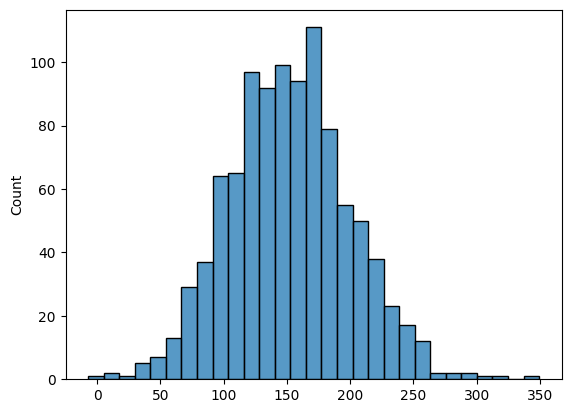

In [12]:
# Create variable
var = sts.norm.rvs(scale=50, loc=150, size=1000)
sns.histplot(var)
plt.show()

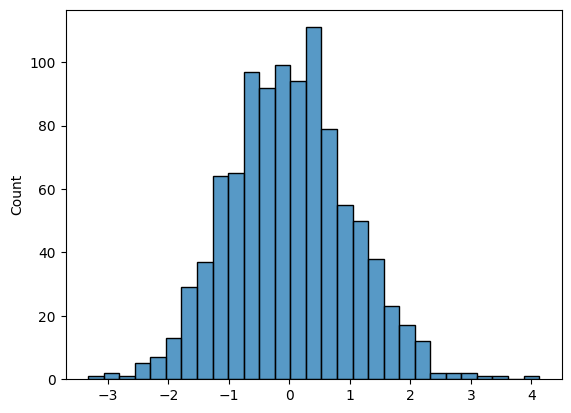

In [13]:
# Standardize
varstd = (var-var.mean())/var.std()
sns.histplot(varstd)
plt.show()

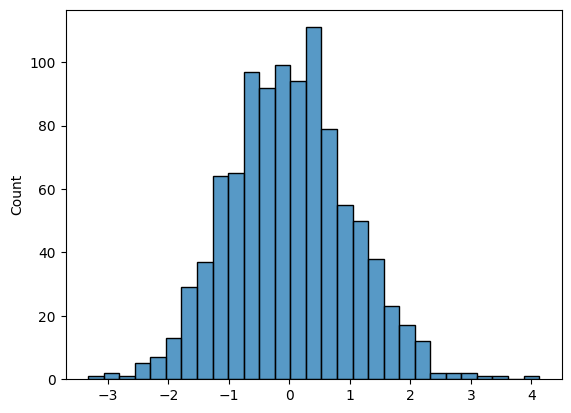

In [14]:
# Alternative 2

varstd2 = sts.zscore(var)
sns.histplot(varstd2)
plt.show()

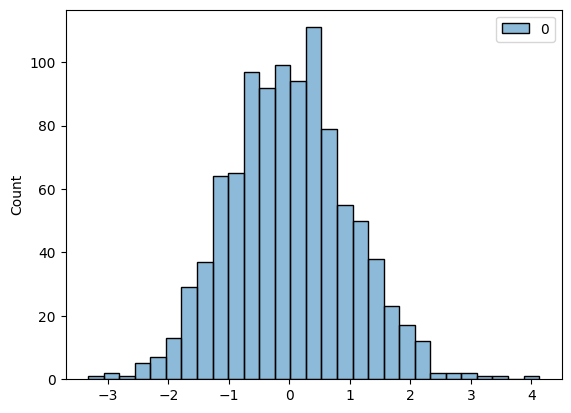

In [15]:
# Alternative 3
# Import Z-Score Standard Scaler from the Sklearn package
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
var2 = pd.DataFrame(var)
varstd3 = scale.fit_transform(var2)
sns.histplot(varstd3)
plt.show()

##### Standardize several predictor variables at once

In [16]:

# Simulate data frame
df3 = pd.DataFrame({'y': [8, 12, 15, 14, 19, 23, 25, 29],
                   'x1': [5, 7, 7, 9, 12, 9, 9, 4],
                   'x2': [11, 8, 10, 6, 6, 5, 9, 12],
                   'x3': [2, 2, 3, 2, 5, 5, 7, 9]})

In [17]:
# define predictor variable columns
df3_x = df3[['x1', 'x2', 'x3']]

# standardize the values for each predictor variable - replace values in df by stadardized ones
df3[['x1', 'x2', 'x3']] = (df3_x-df3_x.mean())/df3_x.std()

#view new data frame
df3

,y,x1,x2,x3
0,8,-1.078639,1.025393,-0.908151
1,12,-0.294174,-0.146485,-0.908151
2,15,-0.294174,0.634767,-0.525772
3,14,0.490290,-0.927736,-0.908151
4,19,1.666987,-0.927736,0.238987
5,23,0.490290,-1.318362,0.238987
6,25,0.490290,0.244141,1.003746
7,29,-1.470871,1.416019,1.768505


In [18]:
# mean of each predictor variable column
df3[['x1', 'x2', 'x3']].mean()

x1    2.775558e-17
x2   -4.163336e-17
x3    5.551115e-17
dtype: float64

In [19]:
# standard deviation of each predictor variable column
df3[['x1', 'x2', 'x3']].std()

x1    1.0
x2    1.0
x3    1.0
dtype: float64

##### Normalize data using min-max scaler

It normalizes the data into a range between 0 and 1 based on the formula: (x - x<sub>min</sub>)/(x<sub>max</sub> - x<sub>min</sub>)

In [20]:
# define predictor variable columns
df4 = df3
df4_x = df4[['x1', 'x2', 'x3']]

# standardize the values for each predictor variable - replace values in df by stadardized ones
df4[['x1', 'x2', 'x3']] = (df4_x-df4_x.min())/(df4_x.max()-df4_x.min())
df4

,y,x1,x2,x3
0,8,0.125,0.857143,0.000000
1,12,0.375,0.428571,0.000000
2,15,0.375,0.714286,0.142857
3,14,0.625,0.142857,0.000000
4,19,1.000,0.142857,0.428571
5,23,0.625,0.000000,0.428571
6,25,0.625,0.571429,0.714286
7,29,0.000,1.000000,1.000000


### 3. Variable transformation

Variable transformation is a very commonly used procedure to prevent some potential statistical problems, especially when using parametric hypothesis testing such as t-test or regression-based methods. It is especially used to tranform variables with very skewed distributions to become more belly shaped. 

**Logarithmic transformation** is one of the most commonly used. A more general and complex transformations are the **Box-Cox transformations**, which involves the estimation of a parameter (lambda) to approximate as much as possible the variable to a normal distribution. For **proportions**, angular transformations such as the **arcsin** are more appropriate.

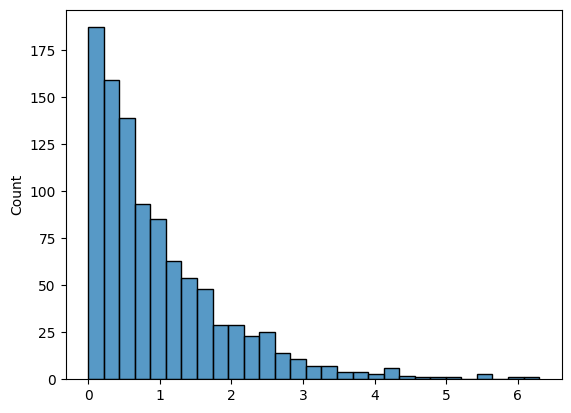

In [21]:
# Simulate right skewed variable
var = sts.expon.rvs(scale=1, loc=0, size=1000)
sns.histplot(var)
plt.show()

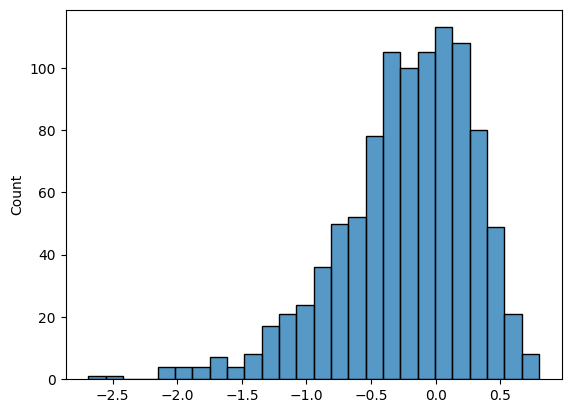

In [22]:
# Logarithmic transformation
varlog = np.log10(var)
sns.histplot(varlog)
plt.show()

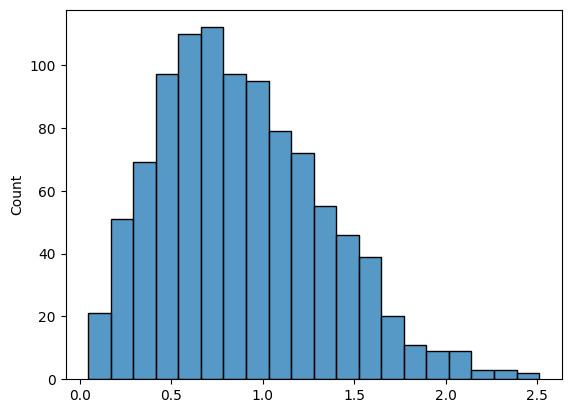

In [23]:
# Square-root transformation
varsqrt = np.sqrt(var)
sns.histplot(varsqrt)
plt.show()

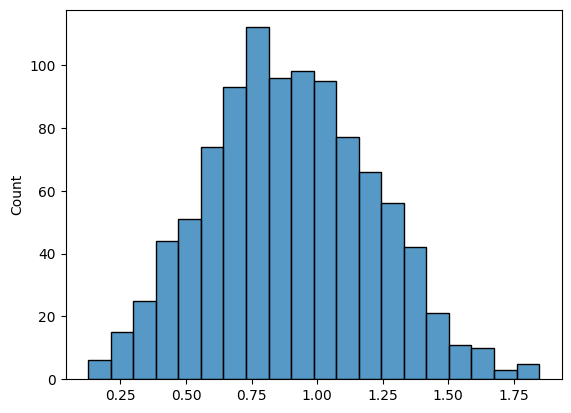

In [24]:
# Cube-root transformation
varcbrt = np.cbrt(var)
sns.histplot(varcbrt)
plt.show()

Lambda value used for Transformation: 0.26


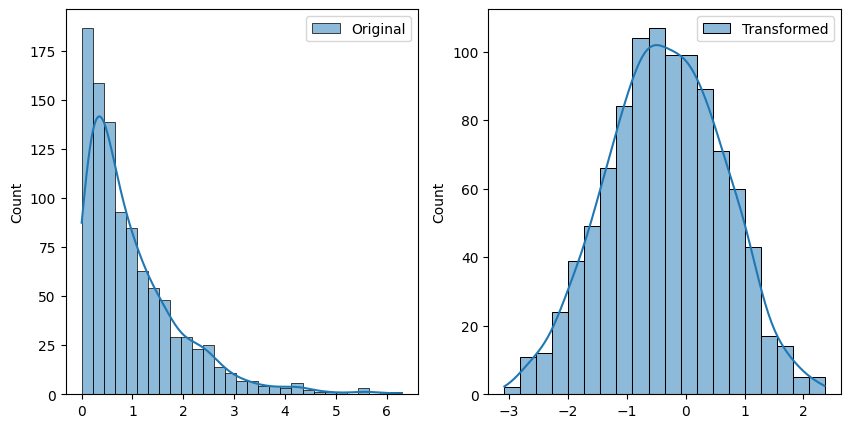

In [25]:
# Box-cox transformation
from scipy import stats

fitted_data, fitted_lambda = stats.boxcox(var)

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.histplot(var, kde = True,
            label = "Original", ax = ax[0]).legend(loc = "upper right")
 
sns.histplot(fitted_data, kde = True,
            label = "Transformed", ax = ax[1]).legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {round(fitted_lambda, 3)}")

In [26]:
# Transform the values for each predictor variable in a table - replace values in df3 (see above) by transformed ones
df3[['x1', 'x2', 'x3']] = np.log10(df3[['x1', 'x2', 'x3']])
df3
# Alternative:
# df3[['x1', 'x2', 'x3']] = df3[['x1', 'x2', 'x3']].apply(np.log10)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


,y,x1,x2,x3
0,8,-0.903090,-0.066947,-inf
1,12,-0.425969,-0.367977,-inf
2,15,-0.425969,-0.146128,-0.845098
3,14,-0.204120,-0.845098,-inf
4,19,0.000000,-0.845098,-0.367977
5,23,-0.204120,-inf,-0.367977
6,25,-0.204120,-0.243038,-0.146128
7,29,-inf,0.000000,0.000000


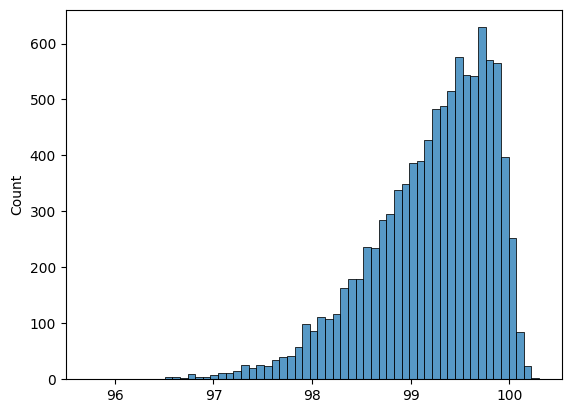

In [27]:
# Now with a left skewed variable?
from scipy.stats import skewnorm

var2 = skewnorm.rvs(a = -10,loc=100, size=10000)

sns.histplot(var2)
plt.show()

Lambda value used for Transformation: 64.544


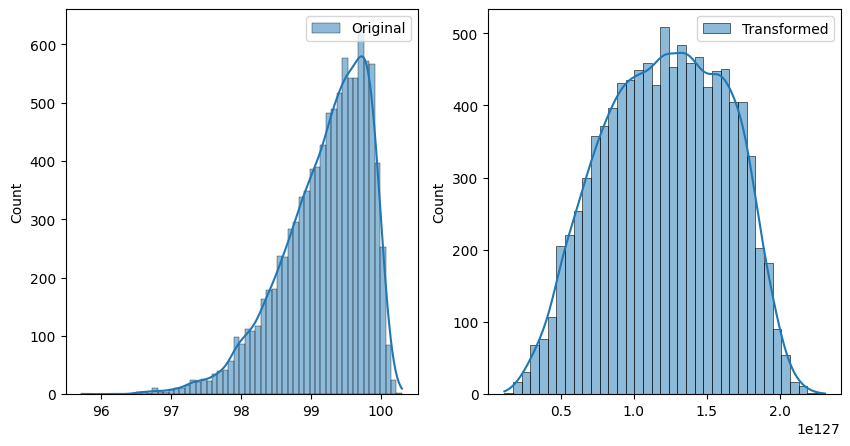

In [28]:
# Box-cox transformation

fitted_data, fitted_lambda = stats.boxcox(var2)

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.histplot(var2, kde = True,
            label = "Original", ax = ax[0]).legend(loc = "upper right")
 
sns.histplot(fitted_data, kde = True,
            label = "Transformed", ax = ax[1]).legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {round(fitted_lambda, 3)}")

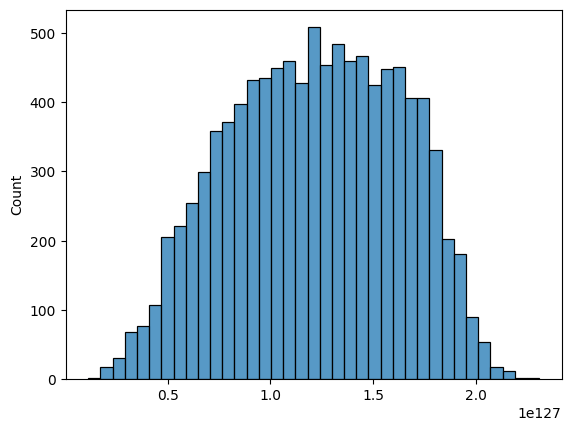

In [29]:
# The fitted_data results from using the following expression:
varlog = (var2**fitted_lambda-1)/fitted_lambda
sns.histplot(varlog)
plt.show()

### 4. Engineer features in the data

This kind of data transformation involves generating new variables from existing ones. A common procedure is to aggregate values for each category of a factor, using functions such as the sum, the mean, maximum, ... In other situations, new variables are generated simply by applying a given function (e.g. sum) to a set of columns in a data table.

A usefull function to generate new variables is again the pandas' pivot_table(), as shown by the  examples that follows using the df DataFrame generated above.

In [30]:
# Generate the sum of each fruit production from df
df.pivot_table(index=['Fruit'], values=['Production'], aggfunc='sum')

,Production
Fruit,
blackberry,2600
blue berry,1500
gooseberry,1210
raspberry,2100
strawberry,4000


In [31]:
# Generate the sum of each fruit production at each farm hold
df.pivot_table(index=['Fruit', 'Hold'], values=['Production'], aggfunc='sum')

Production
Fruit      Hold            
blackberry B           2600
blue berry A             50
           D           1450
gooseberry A            910
           C            300
raspberry  C           2100
strawberry A           2000
           B           1000
           C           1000

In [32]:
# Generate the median, mean, max and sum of each fruit production per farm hold and year
df.pivot_table(index=['Year','Fruit', 'Hold'], values=['Production'], aggfunc={'median', 'mean', 'max', 'sum'})

Production                      
                            max    mean  median   sum
Year Fruit      Hold                                 
2001 blackberry B           300   300.0   300.0   300
     blue berry D           500   500.0   500.0   500
     raspberry  C           400   400.0   400.0   400
     strawberry A          1000  1000.0  1000.0  1000
2002 blackberry B           500   500.0   500.0   500
     gooseberry A           800   800.0   800.0   800
     raspberry  C           700   700.0   700.0   700
     strawberry C          1000  1000.0  1000.0  1000
2003 blackberry B           900   900.0   900.0   900
     blue berry A            50    50.0    50.0    50
     gooseberry A            60    60.0    60.0    60
     strawberry A          1000  1000.0  1000.0  1000
2004 blue berry D           200   200.0   200.0   200
     gooseberry C           300   300.0   300.0   300
     raspberry  C           750   750.0   750.0   750
     strawberry B          1000  1000.0  1000.0  1000
2005 blackberry B           900   900.0   900.0   900
     blue berry D           750   750.0   750.0   750
     gooseberry A            50    50.0    50.0    50
     raspberry  C           250   250.0   250.0   250

In [33]:
# Generating a new variable from summing variables x1, x2 and x3 of df3 generated above.
df3['Sum'] = df3[['x1', 'x2', 'x3']].sum(axis=1) # Sums the  variables and adds new variable called 'Sum'
df3

,y,x1,x2,x3,Sum
0,8,-0.903090,-0.066947,-inf,-inf
1,12,-0.425969,-0.367977,-inf,-inf
2,15,-0.425969,-0.146128,-0.845098,-1.417195
3,14,-0.204120,-0.845098,-inf,-inf
4,19,0.000000,-0.845098,-0.367977,-1.213075
5,23,-0.204120,-inf,-0.367977,-inf
6,25,-0.204120,-0.243038,-0.146128,-0.593286
7,29,-inf,0.000000,0.000000,-inf


## References

Beginner Explanation for Data Transformation, https://towardsdatascience.com/beginner-explanation-for-data-transformation-9add3102f3bf

How to Standardize Data in Python (With Examples), https://www.statology.org/standardize-data-python/

Normalize a Pandas Column or Dataframe (w/ Pandas or sklearn), https://datagy.io/pandas-normalize-column/

Python | Box-Cox Transformation, https://www.geeksforgeeks.org/box-cox-transformation-using-python/

Pivot Tables in Pandas with Python, https://datagy.io/python-pivot-tables/

Transformations of Stack, Melt, Pivot Table in pandas, https://towardsdatascience.com/transformations-of-stack-melt-pivot-table-901292196d9e